In [1]:
import requests
from bs4 import BeautifulSoup as BS  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
urlbase_2019='https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page'
res = requests.post(urlbase_2019)

In [3]:
#Number of pages of results

pgs_2016 = 154
pgs_2017 = 147
pgs_2018 = 85
pgs_2019 = 113

pgs_half_2016 = 898
pgs_half_2017 = 892
pgs_half_2018 = 598
pgs_half_2019 = 690

In [4]:
#Base URLs for each race results page

urlbase_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [5]:
def marathon(url,pages):
    m = []
    df = pd.DataFrame()
    for n in range(1, pages + 1): 
        response = requests.post(url + str(n)) 
        soup = BS(response.content, 'lxml')
        tables = soup.find_all('table', attrs = {'class': 'table table-responsive table-bordered'})
        result_list = pd.read_html(str(tables[0]))
        m= result_list[0]
        df = df.append(m, ignore_index = True)
    return df
    
    
    

    

In [6]:
marathon_2016=marathon(urlbase_2016,pgs_2016)

In [7]:
marathon_2016.head(2)

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:25:42
1,2,3,Brian Shelton,02:34:43


In [8]:
marathon_2017=marathon(urlbase_2017,pgs_2017)

In [9]:
marathon_2017.head(2)

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:40:25
1,2,1145,Ryan Regnier,02:56:28


In [10]:
marathon_2018=marathon(urlbase_2018,pgs_2018)

In [11]:
marathon_2018.head(2)

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:28:16
1,2,3,Garang Madut,02:29:52


In [12]:
marathon_2019=marathon(urlbase_2019,pgs_2019)

In [13]:
marathon_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  2811 non-null   int64 
 1   Bib      2811 non-null   int64 
 2   Name     2811 non-null   object
 3   Time     2811 non-null   object
dtypes: int64(2), object(2)
memory usage: 88.0+ KB


In [33]:
m_2019=pd.read_csv('../data/marathon_2019.csv',index_col=0)
m_2019.head(2)

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,1:37:54
1,2,1,Scott Wietecha,2:34:59


In [15]:
m_2019['Time'].min()

'1:37:54'

In [16]:
m_2019['Time'].max()

'6:43:55'

In [17]:
top_5=m_2019.sort_values(by = 'Time', ascending = True)
top_5.head()

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,1:37:54
1,2,1,Scott Wietecha,2:34:59
2,3,4,Jordan Wilson,2:35:24
3,4,30034,Steelton Flynn,2:39:59
4,5,30035,Thomas Ellis,2:42:09


In [18]:
m_2019.sort_values(by = 'Time', ascending = False).head(5)

,Overall,Bib,Name,Time
2024,2025,30026,Alex Easley,6:43:55
2023,2024,30113,Jacqueline Spires,6:36:58
2022,2023,32980,Daniel Albert,6:35:52
2021,2022,33147,Deanna Alexander,6:30:17
2020,2021,32032,Casey Thomaston,6:29:57


In [19]:
marathon_2016['year']=2016

In [20]:
marathon_2016.head(2)

,Overall,Bib,Name,Time,year
0,1,1,Scott Wietecha,02:25:42,2016
1,2,3,Brian Shelton,02:34:43,2016


In [21]:
marathon_2017['year']=2017

In [22]:
marathon_2018['year']=2018

In [23]:
marathon_2019['year']=2019

In [24]:
m1=pd.concat([marathon_2016,marathon_2017])
m1.head(2)

,Overall,Bib,Name,Time,year
0,1,1,Scott Wietecha,02:25:42,2016
1,2,3,Brian Shelton,02:34:43,2016


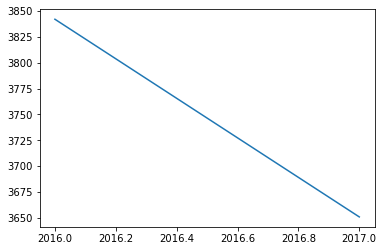

In [25]:
m1.year.value_counts().plot()

In [26]:
m2=pd.concat([marathon_2018,marathon_2019])
m2.head(2)

,Overall,Bib,Name,Time,year
0,1,1,Scott Wietecha,02:28:16,2018
1,2,3,Garang Madut,02:29:52,2018


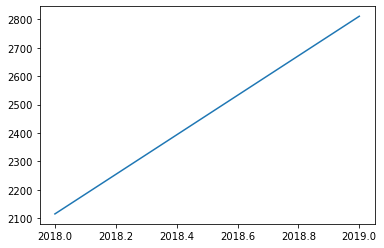

In [27]:
m2.year.value_counts().plot()

In [28]:
m3=pd.concat([m1,m2])

In [29]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12419 entries, 0 to 2810
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  12419 non-null  int64 
 1   Bib      12419 non-null  int64 
 2   Name     12419 non-null  object
 3   Time     12419 non-null  object
 4   year     12419 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 582.1+ KB


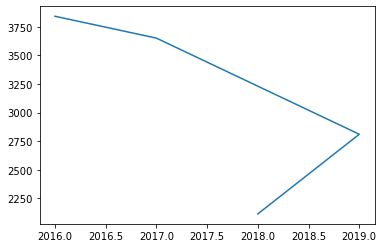

In [30]:
m3.year.value_counts().plot()

Text(0, 0.5, 'count_of_runners')

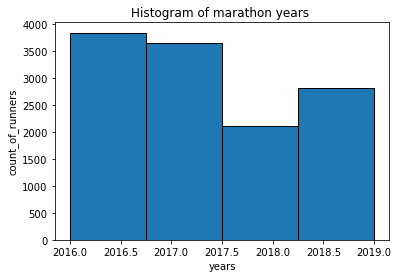

In [36]:
import pylab as pl
m3['year'].plot.hist(bins=4,edgecolor='k').autoscale(enable=True,axis='both,tight=True'),pl.title("Histogram of marathon years ")
pl.xlabel("years")
pl.ylabel("count_of_runners")